In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
results = pd.read_csv('../../source/out.txt')

In [32]:
da = np.zeros((20,12))
with open('../../source/out.txt') as f:
    f.readline()
    for i,line in enumerate(f):
        ba = line.split(',')
        da[i] =ba[16:28] # Up to 16 are hyperparameters, after 28 are energy states.  

In [36]:
df = pd.DataFrame(da,columns=list(results.columns[16:]))

In [37]:
df

,volatility_unhedged,correlation_unhedged,sharpe_unhedged,returns_unhedged,volatility_markethedged,correlation_markethedged,sharpe_markethedged,returns_markethedged,volatility_sphedged,correlation_sphedged,sharpe_sphedged,returns_sphedged
0,0.011360,0.924075,0.028499,-0.051316,0.003809,0.075330,-0.130734,0.092938,0.004407,0.105617,-0.045083,0.039425
1,0.012054,0.944995,0.005522,0.001163,0.004128,0.072448,-0.057747,0.046541,0.004037,0.155745,-0.111795,0.084873
2,0.011355,0.931473,0.024520,-0.042140,0.003836,0.064566,-0.028823,0.022502,0.004180,0.056730,-0.065835,0.053335
3,0.011105,0.911871,0.041964,-0.081181,0.003982,0.076479,-0.016016,0.013745,0.004559,0.155079,-0.013888,0.014125
4,0.011636,0.928485,0.056907,-0.121575,0.003621,0.084116,0.033834,-0.022632,0.004337,0.069834,0.030368,-0.023883
5,0.010136,0.933814,0.040863,-0.072526,0.003395,0.035869,0.024586,-0.015111,0.003630,0.143614,-0.011121,0.009022
6,0.011881,0.916876,0.029736,-0.056094,0.004422,0.116958,-0.010995,0.011208,0.004873,0.030944,-0.037252,0.036642
7,0.011967,0.899129,0.052830,-0.114266,0.004628,0.069000,0.014196,-0.010674,0.005247,0.047567,0.016975,-0.014642
8,0.011096,0.924201,0.046631,-0.091960,0.004251,0.143285,-0.004437,0.005370,0.004271,0.002552,-0.015683,0.014580
9,0.012070,0.889089,0.052030,-0.113093,0.004564,0.036530,0.034180,-0.028503,0.005586,0.083313,0.013269,-0.011370


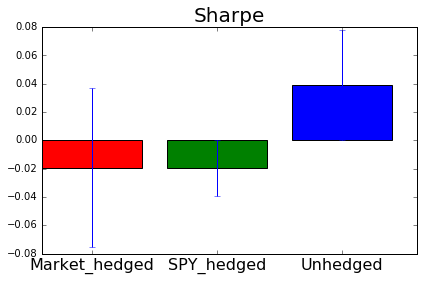

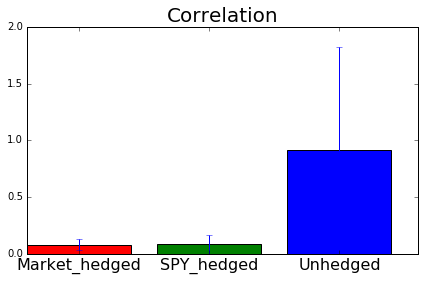

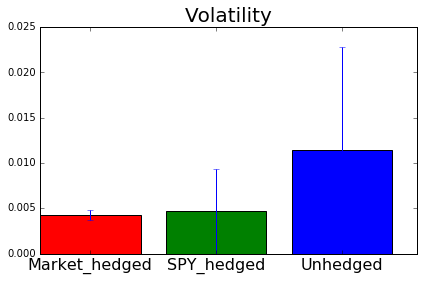

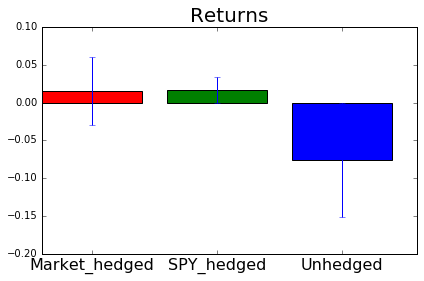

In [51]:
for metric in ['sharpe','correlation','volatility','returns']:
    market_hedged = df[metric+'_markethedged']
    spy_hedged = df[metric+'_sphedged']
    unhedged = df[metric+'_unhedged']
    
    market_mean = np.mean(market_hedged)
    spy_mean = np.mean(spy_hedged)
    un_mean = np.mean(unhedged)

    market_std = np.std(market_hedged)
    spy_std = np.mean(spy_hedged)
    un_std = np.mean(unhedged)


    
    plt.bar([0,1,2],[market_mean, spy_mean, un_mean], color=['r','g','b'],yerr=[market_std,spy_std,un_std])
    plt.xticks(np.array([0,1,2]) + 0.4, ('Market_hedged', 'SPY_hedged', 'Unhedged'), fontsize = 16)

    plt.title(metric.capitalize(), fontsize=20)
    plt.tight_layout()
    plt.show()

In [95]:
da = np.zeros((20,12))
with open('../../source/out_0411_cj.txt') as f:
    f.readline()
    for i,line in enumerate(f):
        ba = line.split(',')
        da[i] =ba[16:28] # Up to 16 are hyperparameters, after 28 are energy states.  

In [147]:
import sys
sys.path.append('../../source')

In [148]:
from BetaUtils import beta_hedging_ret, get_beta
from energy_functions import correlation, neg_returns, neg_sharpe, volatility
from Hedge import Hedge

In [155]:
parameters =[]
with open('../../source/in_1.txt') as f:
    f.readline()
    for i,line in enumerate(f):
        parameters.append(line.split(','))

In [167]:

portfolios = []
with open('../../source/portfolios.txt') as f:
    for i,line in enumerate(f):
        portfolios.append(line.split(',')[1:-1])

In [159]:
print parameters[0]

['2007-01-01', '2007-12-31', '2007-10-01', '2008-12-31', '60', '0', '0', '0.1', '0.99', '0.001', '100', '5000', '0', '1', '0', '0', '0\n']


In [193]:
columns = []
for mark in ['market','spy','unhedged']:
    for metric in ['neg_sharpe','correlation','volatility','neg_returns']:
        columns.append(mark+'_'+metric)

In [194]:
columns

['market_neg_sharpe',
 'market_correlation',
 'market_volatility',
 'market_neg_returns',
 'spy_neg_sharpe',
 'spy_correlation',
 'spy_volatility',
 'spy_neg_returns',
 'unhedged_neg_sharpe',
 'unhedged_correlation',
 'unhedged_volatility',
 'unhedged_neg_returns']

In [207]:
hedge = Hedge(stocksdir='../../data/all_stocks.csv',spydir='../../data/spy.csv',begindate=parameters[0][2], enddate=parameters[0][3])

In [324]:
# CJ1

final_markets1 = []
with open('../../source/outmarket.txt') as f:
    for line in f:
        final_markets1.append(line[2:-4].split("', '"))

parameters1 =[]
with open('../../source/in_1.txt') as f:
    f.readline()
    for i,line in enumerate(f):
        parameters1.append(line.split(','))
        
hedge = Hedge(stocksdir='../../data/all_stocks.csv',spydir='../../data/spy.csv',\
              begindate=parameters1[0][2], enddate=parameters1[0][3])

window = int(parameters1[0][4])
results = np.zeros((5,12))


for i in range(len(final_markets)):
    hedge.portfolio=portfolios[i]
    hedge.market=final_markets1[i]
    
    spy = hedge.spy.pct_change()
    
    _, betas = get_beta(hedge.dollar_portfolio_sum_ret, hedge.dollar_market_sum_ret)
    beta_hedging_returns = beta_hedging_ret(betas[1:],hedge.dollar_portfolio_sum_ret[window+1:],\
                                            hedge.dollar_market_sum_ret[window+1:])
    market_hedged_returns = beta_hedging_returns

    # Get returns hedged against S&P 500
    _, betas = get_beta(hedge.dollar_portfolio_sum_ret, hedge.spy.pct_change())
    beta_hedging_returns = beta_hedging_ret(betas[1:],hedge.dollar_portfolio_sum_ret[window+1:],\
                                            hedge.spy.pct_change()[window+1:])
    spy_hedged_returns = beta_hedging_returns

    # Get unhedged returns
    unhedged_returns = hedge.dollar_portfolio_sum_ret[window+1:].values
    
    for j,metric in enumerate(['neg_sharpe','correlation','volatility','neg_returns']):
        results[i,j] = globals()[metric](market_hedged_returns,spy[window+1:])
        results[i,j+4] = globals()[metric](spy_hedged_returns,spy[window+1:])
        results[i,j+8] = globals()[metric](unhedged_returns,spy[window+1:])

df1 = pd.DataFrame(results,columns=columns)

In [325]:
# JF

final_markets0 = []
with open('../../source/outmarket0.txt') as f:
    for line in f:
        final_markets0.append(line[2:-4].split("', '"))

parameters0 =[]
with open('../../source/in_0.txt') as f:
    f.readline()
    for i,line in enumerate(f):
        parameters0.append(line.split(','))
        
hedge = Hedge(stocksdir='../../data/all_stocks.csv',spydir='../../data/spy.csv',\
              begindate=parameters0[0][2], enddate=parameters0[0][3])

window = int(parameters0[0][4])
results = np.zeros((5,12))
for i in range(len(final_markets)):
    hedge.portfolio=portfolios[i]
    hedge.market=final_markets0[i]
    
    spy = hedge.spy.pct_change()
    
    _, betas = get_beta(hedge.dollar_portfolio_sum_ret, hedge.dollar_market_sum_ret)
    beta_hedging_returns = beta_hedging_ret(betas[1:],hedge.dollar_portfolio_sum_ret[window+1:],\
                                            hedge.dollar_market_sum_ret[window+1:])
    market_hedged_returns = beta_hedging_returns

    # Get returns hedged against S&P 500
    _, betas = get_beta(hedge.dollar_portfolio_sum_ret, hedge.spy.pct_change())
    beta_hedging_returns = beta_hedging_ret(betas[1:],hedge.dollar_portfolio_sum_ret[window+1:],\
                                            hedge.spy.pct_change()[window+1:])
    spy_hedged_returns = beta_hedging_returns

    # Get unhedged returns
    unhedged_returns = hedge.dollar_portfolio_sum_ret[window+1:].values
    
    for j,metric in enumerate(['neg_sharpe','correlation','volatility','neg_returns']):
        results[i,j] = globals()[metric](market_hedged_returns,spy[window+1:])
        results[i,j+4] = globals()[metric](spy_hedged_returns,spy[window+1:])
        results[i,j+8] = globals()[metric](unhedged_returns,spy[window+1:])

df0 = pd.DataFrame(results,columns=columns)

In [390]:
#HT

parameters2 =[]
with open('../../source/in_2.txt') as f:
    f.readline()
    for i,line in enumerate(f):
        parameters2.append(line.split(','))
        
final_markets2 = []
with open('../../source/outmarket2.txt') as f:
    for line in f:
        final_markets2.append(line[2:-4].split("', '"))
        
hedge = Hedge(stocksdir='../../data/all_stocks.csv',spydir='../../data/spy.csv',\
              begindate=parameters2[0][2], enddate=parameters2[0][3])

window = int(parameters2[0][4])
results = np.zeros((5,12))
for i in range(len(final_markets2)):

    hedge.portfolio=portfolios[i]
    hedge.market=final_markets2[i]

    spy = hedge.spy.pct_change()

    _, betas = get_beta(hedge.dollar_portfolio_sum_ret, hedge.dollar_market_sum_ret)
    beta_hedging_returns = beta_hedging_ret(betas[1:],hedge.dollar_portfolio_sum_ret[window+1:],\
                                            hedge.dollar_market_sum_ret[window+1:])
    market_hedged_returns = beta_hedging_returns

    # Get returns hedged against S&P 500
    _, betas = get_beta(hedge.dollar_portfolio_sum_ret, hedge.spy.pct_change())
    beta_hedging_returns = beta_hedging_ret(betas[1:],hedge.dollar_portfolio_sum_ret[window+1:],\
                                            hedge.spy.pct_change()[window+1:])
    spy_hedged_returns = beta_hedging_returns

    # Get unhedged returns
    unhedged_returns = hedge.dollar_portfolio_sum_ret[window+1:].values

    for j,metric in enumerate(['neg_sharpe','correlation','volatility','neg_returns']):
        results[i,j] = globals()[metric](market_hedged_returns,spy[window+1:])
        results[i,j+4] = globals()[metric](spy_hedged_returns,spy[window+1:])
        results[i,j+8] = globals()[metric](unhedged_returns,spy[window+1:])


df2 = pd.DataFrame(results,columns=columns)

In [327]:
df2

,market_neg_sharpe,market_correlation,market_volatility,market_neg_returns,spy_neg_sharpe,spy_correlation,spy_volatility,spy_neg_returns,unhedged_neg_sharpe,unhedged_correlation,unhedged_volatility,unhedged_neg_returns
0,-0.001022,0.037980,0.007682,0.005524,-0.079312,0.042159,0.008859,-0.184228,-0.101676,0.872340,0.018064,-0.531601
1,-0.020104,0.157284,0.007931,-0.033194,-0.075899,0.057385,0.007619,-0.150324,-0.090556,0.915506,0.018630,-0.470637
2,-0.046859,0.089002,0.008121,-0.092665,-0.121469,0.014950,0.008863,-0.302659,-0.117929,0.862156,0.017307,-0.619038
3,-0.085330,0.050464,0.008476,-0.191524,-0.144914,0.004032,0.010011,-0.428965,-0.131237,0.852228,0.018827,-0.793599
4,0.015806,0.063100,0.011612,0.061641,-0.073479,0.010638,0.011182,-0.214008,-0.097268,0.809784,0.018919,-0.527474


In [328]:
df0

,market_neg_sharpe,market_correlation,market_volatility,market_neg_returns,spy_neg_sharpe,spy_correlation,spy_volatility,spy_neg_returns,unhedged_neg_sharpe,unhedged_correlation,unhedged_volatility,unhedged_neg_returns
0,-0.021362,0.167293,0.005512,-0.026283,-0.029116,0.035591,0.005503,-0.037378,-0.028252,0.881399,0.011520,-0.067669
1,-0.057458,0.171913,0.012162,-0.171293,-0.073781,0.010473,0.011714,-0.223008,-0.072176,0.502901,0.013278,-0.246257
2,0.003714,0.067589,0.004448,0.006663,-0.007039,0.045433,0.005413,-0.005944,-0.019296,0.833734,0.009727,-0.036134
3,-0.107983,0.034698,0.004928,-0.140585,-0.061906,0.002127,0.005539,-0.086386,-0.049883,0.835772,0.009987,-0.120049
4,0.034719,0.061073,0.004697,0.043094,0.009380,0.035636,0.005446,0.016546,-0.010319,0.865428,0.010713,-0.013509


In [329]:
df1

,market_neg_sharpe,market_correlation,market_volatility,market_neg_returns,spy_neg_sharpe,spy_correlation,spy_volatility,spy_neg_returns,unhedged_neg_sharpe,unhedged_correlation,unhedged_volatility,unhedged_neg_returns
0,0.024176,0.064887,0.006388,0.043781,0.068278,0.042679,0.008643,0.148461,0.086620,0.918763,0.021501,0.415372
1,-0.085069,0.052490,0.006097,-0.136550,-0.014487,0.067591,0.008656,-0.022766,0.050199,0.935652,0.024314,0.322286
2,0.053772,0.146942,0.006791,0.094628,0.086356,0.097813,0.009119,0.191324,0.091429,0.910737,0.021801,0.435711
3,0.062746,0.124697,0.006731,0.107687,0.091982,0.105449,0.009049,0.200410,0.089441,0.925387,0.023684,0.459507
4,0.007666,0.095401,0.006284,0.017240,0.032214,0.032855,0.008950,0.080672,0.068489,0.926378,0.023355,0.381280


In [330]:
for df in [df0,df1,df2]:
    df['market_returns'] = -df['market_neg_returns'] 
#     df = df.drop(['market_neg_returns'],axis=1)
    df['spy_returns'] = -df['spy_neg_returns']
#     df = df.drop(['spy_neg_returns'],axis=1)
    df['unhedged_returns'] = -df['unhedged_neg_returns']
#     df = df.drop(['unhedged_neg_returns'],axis=1)

In [339]:
def display(df, year):
    for metric in ['correlation','volatility','returns']:
        market_hedged = df['market_'+metric].copy()
        spy_hedged = df['spy_'+metric].copy()
        unhedged = df['unhedged_'+metric].copy()
        
        if metric=='returns':
            market_hedged*=100
            spy_hedged*=100
            unhedged*=100

        market_mean = np.mean(market_hedged)
        spy_mean = np.mean(spy_hedged)
        un_mean = np.mean(unhedged)

        market_std = np.std(market_hedged)
        spy_std = np.std(spy_hedged)
        un_std = np.std(unhedged)

        plt.bar([0,1,2],[market_mean, spy_mean, un_mean], color=['b','g','r'],yerr=[market_std,spy_std,un_std])
        plt.xticks(np.array([0,1,2]) + 0.4, ('Market_hedged', 'SPY_hedged', 'Unhedged'), fontsize = 16)

        plt.title(str(year)+" "+metric.capitalize(), fontsize=20)
        plt.tight_layout()
        
        if metric=='correlation':
            plt.ylim((0,1))
        elif metric=='volatility':
            plt.ylim((0,0.025))
        else:
            plt.ylim((-50,80))
            
        plt.xlim((-0.1,2.9))
        
        plt.show()

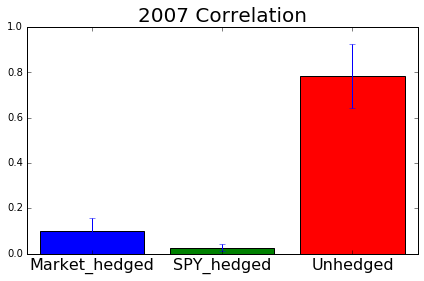

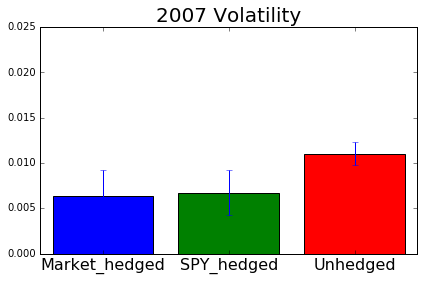

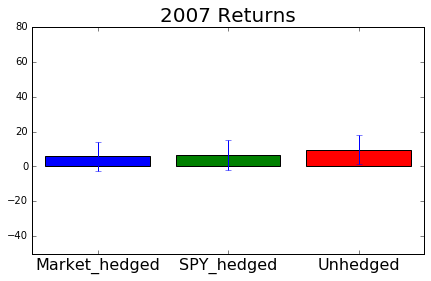

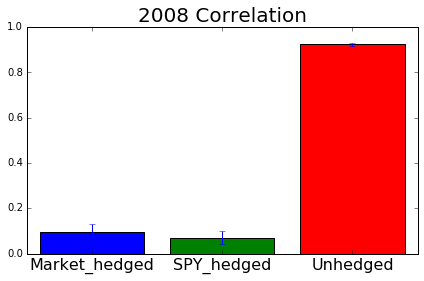

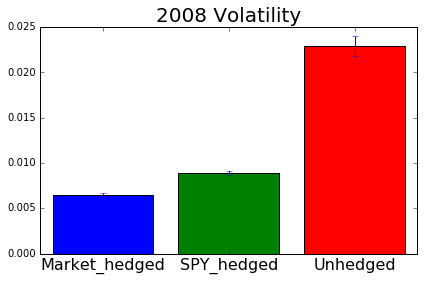

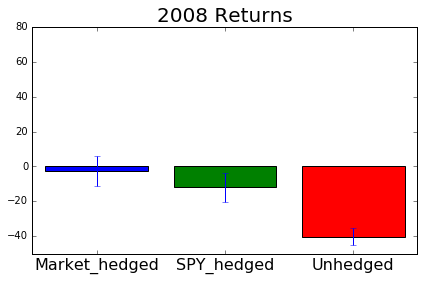

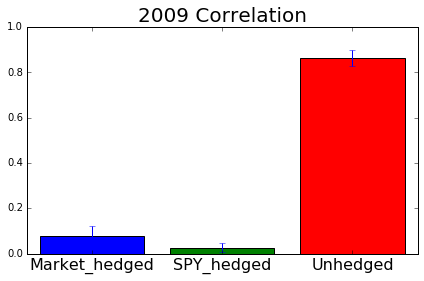

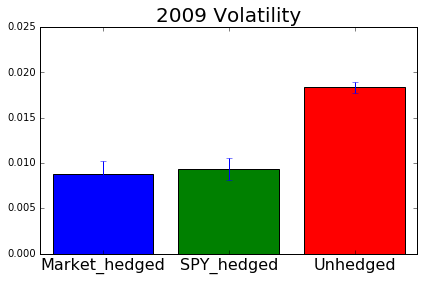

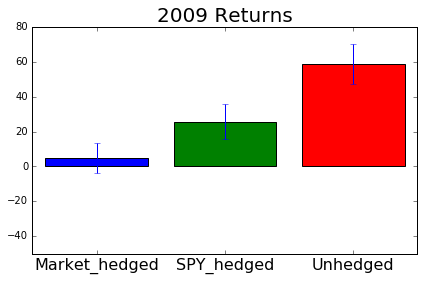

In [340]:
for i,df in enumerate([df0,df1,df2]):
    display(df,i+2007)

In [337]:

def display2(dfs):
    colors = {'unhedged':'r', 'spy':'g', 'market':'b'}
    for metric in ['correlation','volatility','returns']:
        for hedge in ['market','spy','unhedged']:

        
            result7 = df0[hedge+'_'+metric].copy()
            result8 = df1[hedge+'_'+metric].copy()
            result9 = df2[hedge+'_'+metric].copy()
            
            if metric=='returns':
                result7*=100
                result8*=100
                result9*=100
            
            mean7 = np.mean(result7)
            mean8 = np.mean(result8)
            mean9 = np.mean(result9)
            
            std7 = np.std(result7)
            std8 = np.std(result8)
            std9 = np.std(result9)
            
            plt.bar([0,1,2],[mean7, mean8, mean9], color=colors[hedge],yerr=[std7,std8,std9])
            plt.xticks(np.array([0,1,2]) + 0.4, ('2007', '2008', '2009'), fontsize = 16)

            plt.title(metric.capitalize()+", "+hedge.capitalize(), fontsize=20)
            plt.tight_layout()
            
            if metric=='correlation':
                plt.ylim((0,1))
            elif metric=='volatility':
                plt.ylim((0,0.025))
            else:
                plt.ylim((-50,80))
            
            plt.xlim((-0.1,2.9))
            
            plt.show()

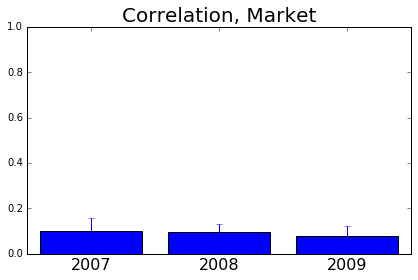

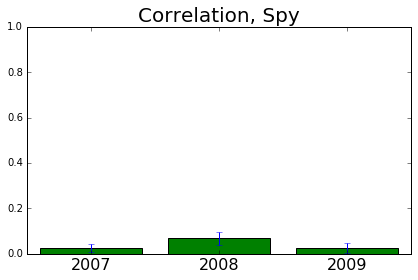

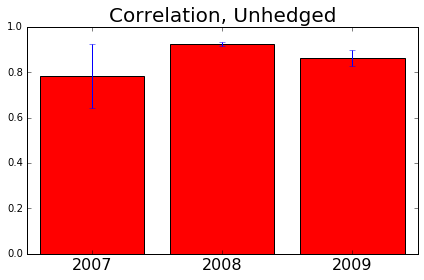

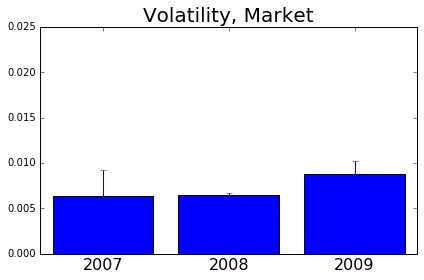

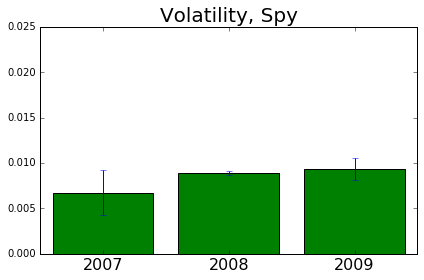

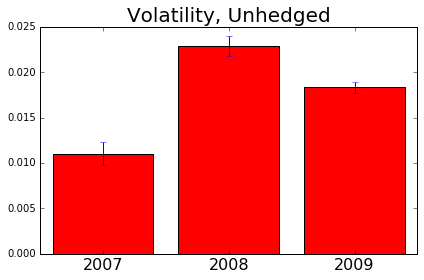

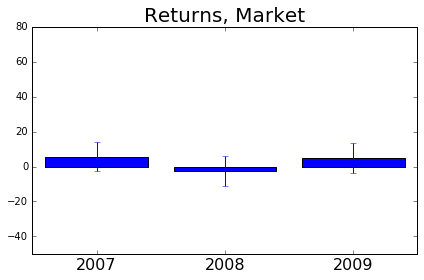

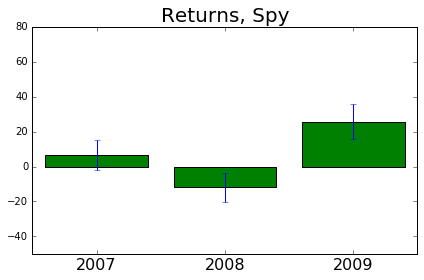

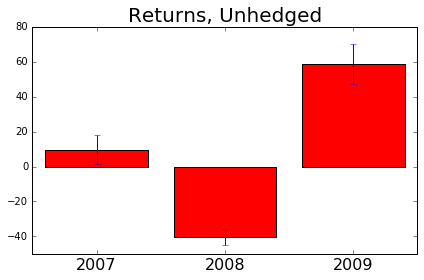

In [338]:
display2([df0,df1,df2])

In [380]:
hedge_all = Hedge(stocksdir='../../data/all_stocks.csv',spydir='../../data/spy.csv',\
              begindate='2006-01-01', enddate='2009-12-31')


In [381]:
indices = []#np.zeros(len(hedge_all.spy.index),dtype=datetime)

for i,date in enumerate(hedge_all.spy.index):
    indices.append(datetime(int(date[0:4]),int(date[5:7]),int(date[8:10])))

In [382]:
import seaborn as sns
sns.set_style("white")

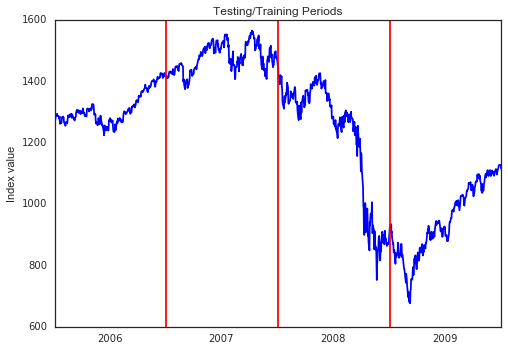

In [388]:
plt.plot(indices,hedge_all.spy.values,color='blue')
plt.ylabel("Index value")
plt.axvline(datetime(2007,1,1),color='r')
plt.axvline(datetime(2008,1,1),color='r')
plt.axvline(datetime(2009,1,1),color='r')
plt.title("Testing/Training Periods")
xtickplaces = [datetime(i,7,1) for i in range(2006,2010)]
xticklabels = range(2006,2010)
plt.xticks(xtickplaces,xticklabels);

(0, 251)

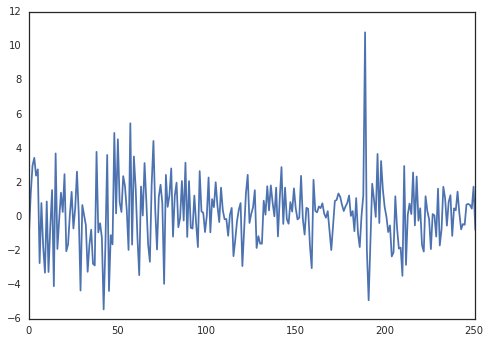

In [399]:
plt.plot(100*unhedged_returns)
plt.xlim((0,251))